In [ ]:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#creating dummy variable for ['Undergrad','Marital.Status','Urban']
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [5]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
data['Taxable.Income'].min(),data['Taxable.Income'].max()
#1002-30000 (consider Risky),30000-99620(consider Good)

(10003, 99619)

In [7]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["TaxInc"] = pd.cut(data["Taxable.Income"],bins = [10002,30000,99620],labels = ["Risky", "Good"])

In [8]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [9]:
data=pd.get_dummies(data,columns=['TaxInc'],drop_first=True)

In [10]:
data.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


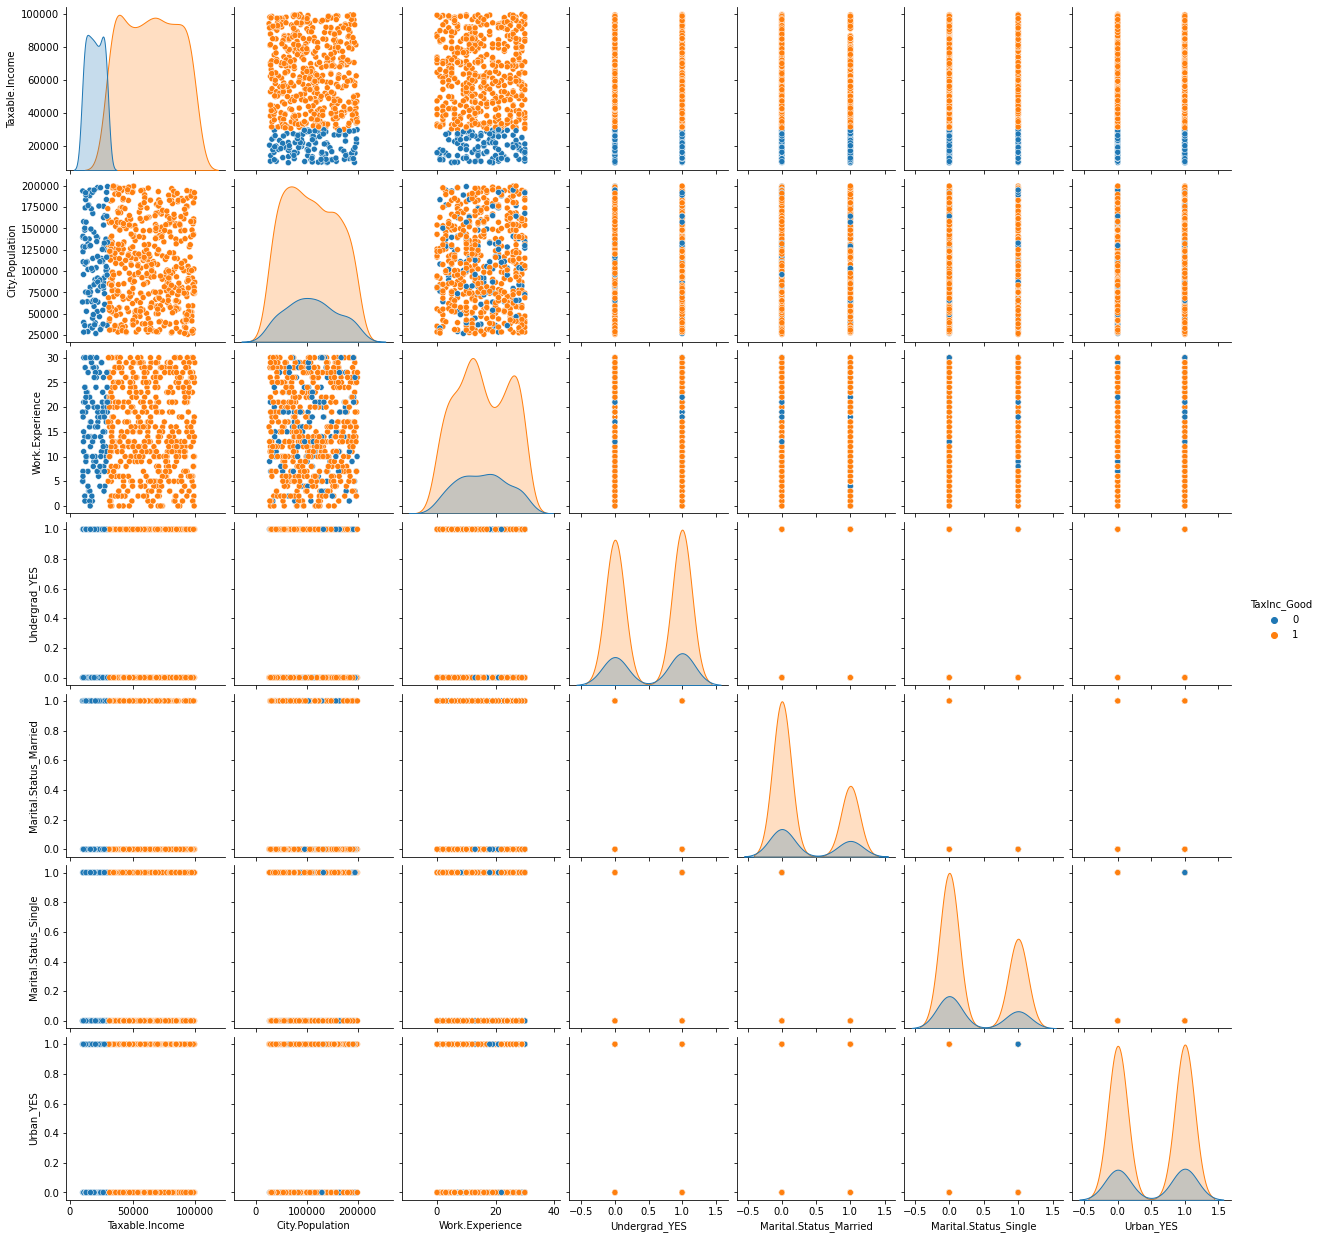

In [11]:
#visualizating the data and show the tax separately
sns.pairplot(data,hue='TaxInc_Good')  #0-risky, 1-Good

In [12]:
#Normalization function
#Data look not even so use normalization (larger values took most domination)
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [13]:
df_norm=norm_func(data.iloc[:,1:]) #consider numerical part of the data
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [14]:
x=df_norm.drop(['TaxInc_Good'],axis=1)
y=df_norm['TaxInc_Good']

In [15]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [17]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split=train_test_split(x,y,test_size=0.2,shuffle=True)

In [18]:
x_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
299,0.989299,0.233333,1.0,0.0,1.0,0.0
535,0.942948,0.100000,0.0,1.0,0.0,0.0
345,0.534595,0.200000,1.0,0.0,0.0,0.0
323,0.801131,0.433333,1.0,1.0,0.0,0.0
39,0.167829,0.533333,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
222,0.818792,0.900000,1.0,0.0,0.0,0.0
327,0.787349,0.233333,1.0,1.0,0.0,0.0
112,0.961264,0.866667,1.0,0.0,1.0,1.0
433,0.594751,0.466667,0.0,1.0,0.0,1.0


# Buliding Decision Tree classifier (CART) using Gini creteria

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

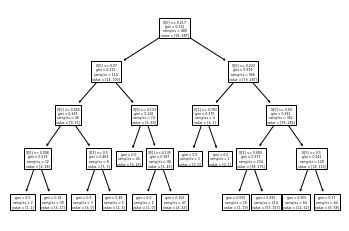

In [21]:
from sklearn import tree
tree.plot_tree(model);

In [22]:
list(x_train.columns)

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES']

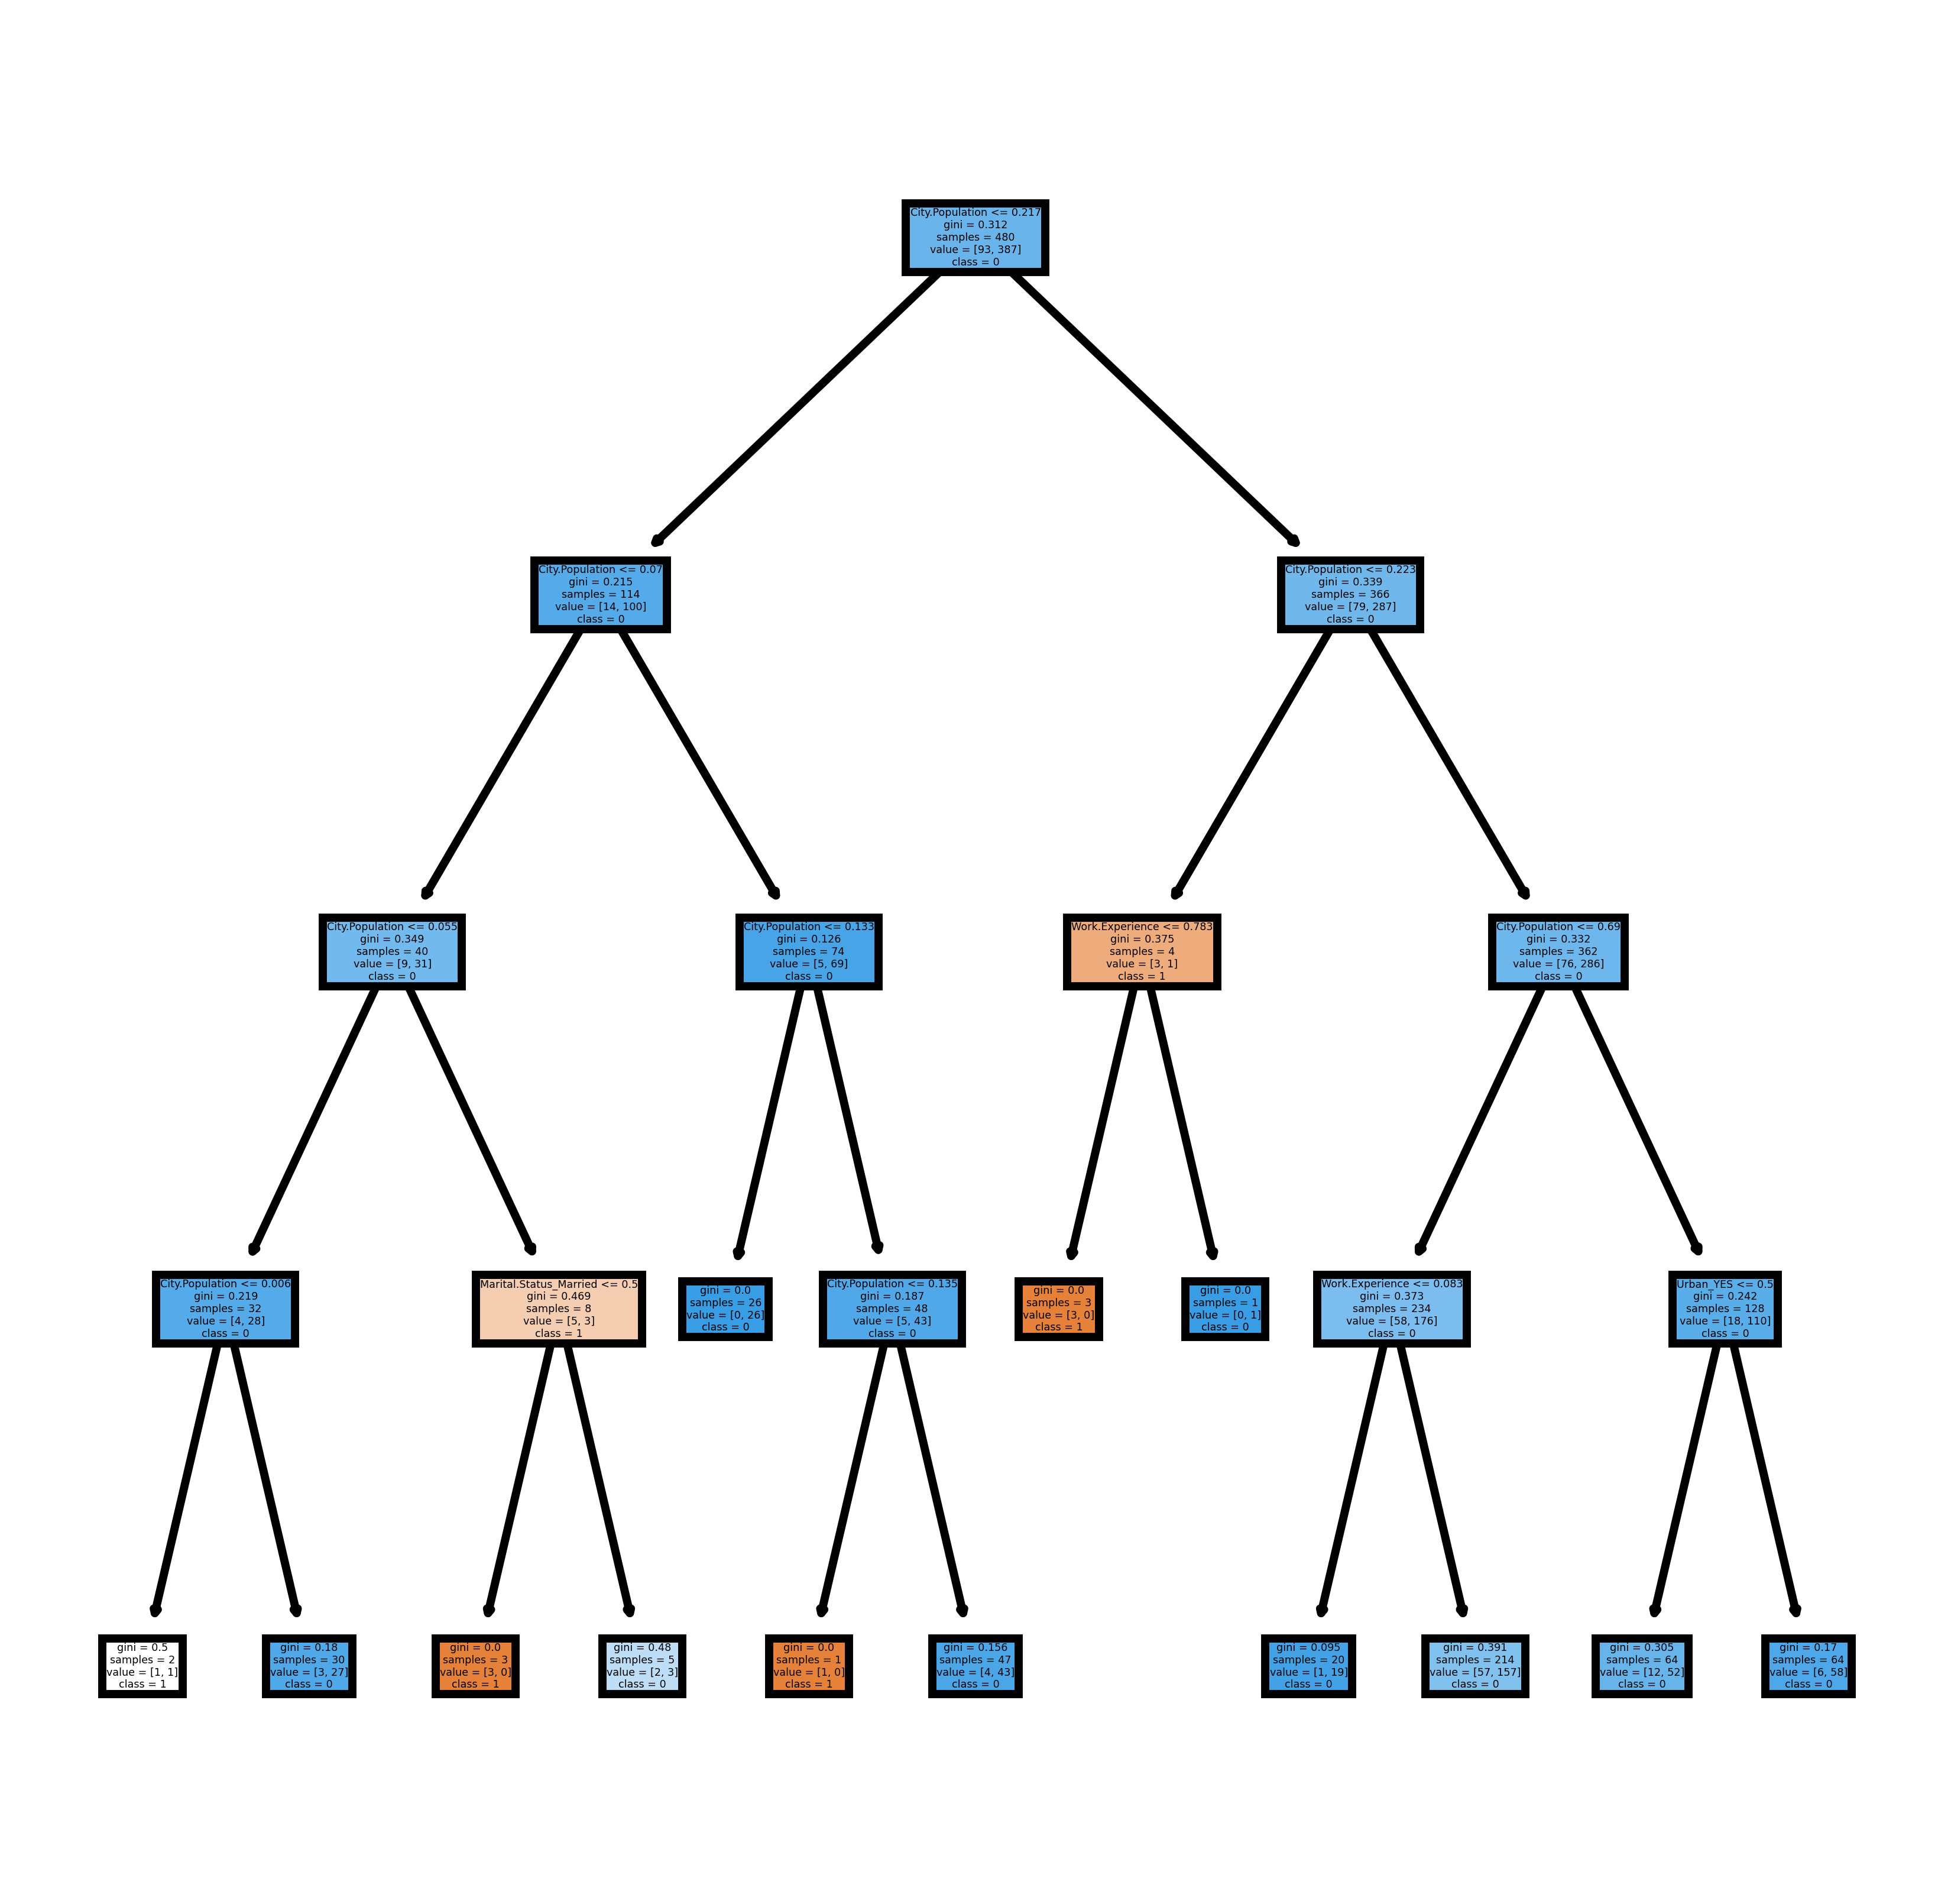

In [23]:
fn=['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES']
cn=['1','0']
f,ax=plt.subplots(1,1,figsize=(4,4),dpi=1000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [24]:
#prediction on data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1.0    117
0.0      3
dtype: int64

In [25]:
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1.])

In [26]:
#checking Accuracy of the model
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.7333333333333333

In [27]:
np.mean(pred==y_test)

0.7333333333333333

# Building decision tree classifier using Entropy criteria. C5.0 

In [28]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [29]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
#prediction
prediction=model2.predict(x_train)

In [31]:
pd.Series(prediction).value_counts()

1.0    473
0.0      7
dtype: int64

In [32]:
from sklearn import metrics
metrics.accuracy_score(prediction,y_train)

0.8125

In [33]:
np.mean(prediction==y_train)

0.8125

In [34]:
pd.crosstab(prediction,y_train)

TaxInc_Good,0.0,1.0
row_0,,
0.0,5,2
1.0,88,385


# Decision Tree Regression Example

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [53]:
array=data.values
x2=array[:,0:2]
y2=array[:,2] #Work.Experience as numerical value (dependent variable)

In [54]:
x2

array([[ 68833,  50047],
       [ 33700, 134075],
       [ 36925, 160205],
       ...,
       [ 47334, 154058],
       [ 98592, 180083],
       [ 96519, 158137]], dtype=int64)

In [55]:
y2

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,shuffle=True)

In [57]:
model4=DecisionTreeRegressor()
model4.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
model4.score(X_test,y_test)

-0.8686087088453953